In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
#check column values for a date row 
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Find the most recent date in the data set.
Recentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Recentdate

('2017-08-23',)

<Figure size 432x288 with 0 Axes>

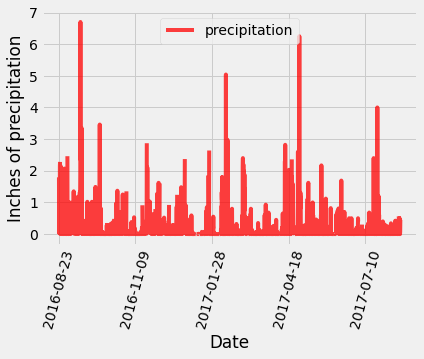

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneYearAgo = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

yearprcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneYearAgo).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
yearprcp_df=pd.DataFrame(yearprcp, columns=['date', 'precipitation'])

# Sort the dataframe by date
yearprcp_df = yearprcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.tight_layout()
yearprcp_df.plot(x='date', y='precipitation', rot = 75, color = "r", alpha = 0.75)
plt.xlabel('Date')
plt.ylabel('Inches of precipitation')
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearprcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
#save most active station in a variable
mostactive = 'USC00519281'
mostactive

'USC00519281'

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == mostactive).all()

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
oneYearAgo = dt.date(2017, 8, 23) - dt.timedelta(days=365)

tob = session.query(Measurement.tobs).filter(Measurement.station == mostactive).\
                filter(Measurement.date >= oneYearAgo).all()

tobDF = pd.DataFrame(tob, columns = ["TOB"])
tobDF.head()

,TOB
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


Text(9.310000000000002, 0.5, 'Frequency')

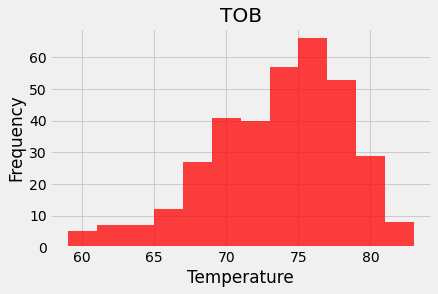

In [28]:
# plot the results as a histogram for the last 12 months of temperature observation data and plot using 12 bins
tobDF.hist(bins=12, color = "r", alpha = 0.75)
plt.tight_layout()
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close session

In [29]:
# Close Session
session.close()